In [92]:
import tensorflow as tf
import keras
from keras import layers

In [93]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_, y_train_), (X_test, y_test) = fashion_mnist.load_data()

In [94]:
X_train_.shape

(60000, 28, 28)

In [95]:
X_test.shape

(10000, 28, 28)

In [96]:
import numpy as np
np.unique(y_train_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [97]:
textual_representation = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot',
}
y_train_desc = [textual_representation[label] for label in y_train_]
np.unique(y_train_desc)

array(['Ankle boot', 'Bag', 'Coat', 'Dress', 'Pullover', 'Sandal',
       'Shirt', 'Sneaker', 'T-shirt/top', 'Trouser'], dtype='<U11')

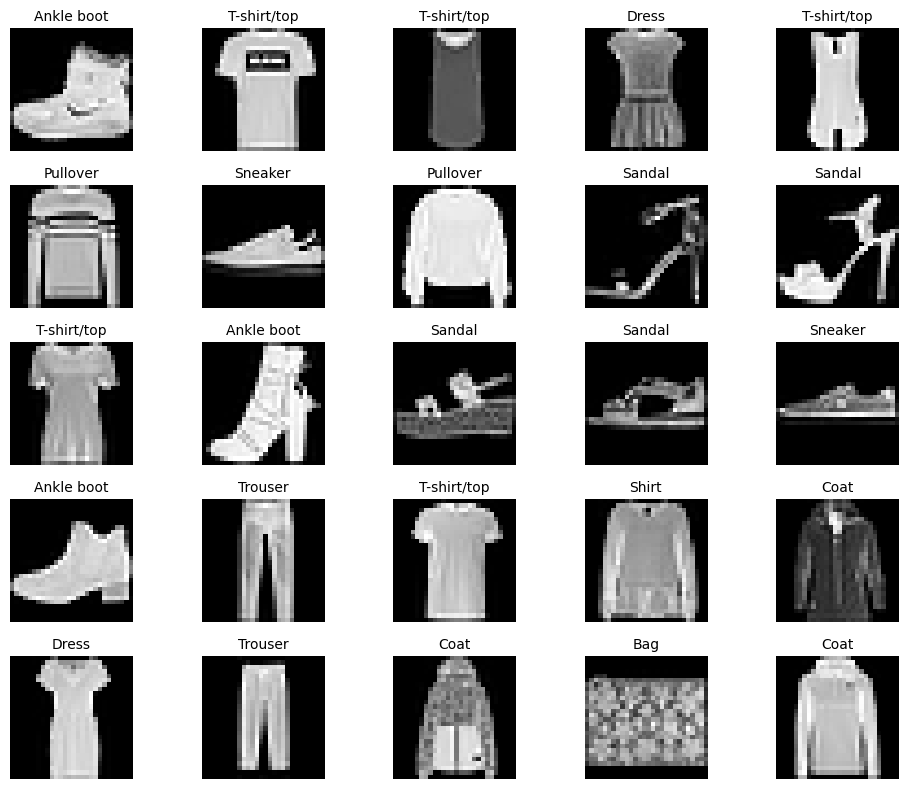

In [98]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(5,5, figsize=(10,8))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_[i], cmap='gray')
    plt.title(y_train_desc[i], fontsize=10)
    plt.axis("off")

plt.tight_layout()

In [99]:
X_train, y_train = X_train_[:50000] / 255.0, y_train_[:50000]
X_valid, y_valid = X_train_[50000:] / 255.0, y_train_[50000:]
X_test = X_test / 255.0

In [100]:
X_train.shape

(50000, 28, 28)

In [101]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [102]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units = 10, activation = 'softmax')
])

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

In [104]:
model.layers

In [105]:
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [106]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 15,
    restore_best_weights = True,
)

In [107]:
history = model.fit(
    X_train, y_train, validation_data = (X_valid, y_valid), epochs = 30,
)

Epoch 1/30
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6580 - accuracy: 0.7639 - val_loss: 0.4275 - val_accuracy: 0.8487
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4728 - accuracy: 0.8305 - val_loss: 0.3951 - val_accuracy: 0.8530
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4336 - accuracy: 0.8448 - val_loss: 0.3739 - val_accuracy: 0.8625
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4099 - accuracy: 0.8510 - val_loss: 0.3804 - val_accuracy: 0.8595
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3925 - accuracy: 0.8571 - val_loss: 0.3615 - val_accuracy: 0.8705
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8624 - val_loss: 0.3530 - val_accuracy: 0.8702
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3690 - accuracy: 0.8656 - val_loss: 0.3403 - val_accuracy:

Minimum validation loss: 0.3171078860759735


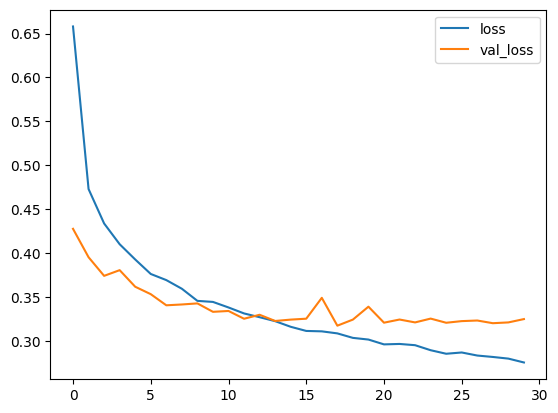

In [108]:
import pandas as pd

history_data = pd.DataFrame(history.history)
history_data.loc[:, ['loss','val_loss']].plot();
print(f"Minimum validation loss: {history_data['val_loss'].min()}")

In [109]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 928us/step - loss: 0.3508 - accuracy: 0.8821


[0.3507815897464752, 0.882099986076355]

In [110]:
model.predict(X_test)

313/313 [==============================] - 0s 801us/step


array([[3.2954216e-11, 1.9100206e-08, 2.2162341e-11, ..., 1.0881514e-03,
        3.7775871e-10, 9.9880338e-01],
       [3.4853761e-05, 2.4987204e-13, 9.4094497e-01, ..., 9.4915350e-24,
        1.6437181e-10, 3.4211721e-18],
       [4.4073847e-20, 1.0000000e+00, 3.2417965e-24, ..., 0.0000000e+00,
        2.6502329e-30, 2.4875184e-37],
       ...,
       [1.4887209e-05, 5.0428901e-11, 3.6733394e-07, ..., 4.3650732e-11,
        9.9993718e-01, 3.0639209e-12],
       [1.5860739e-15, 1.0000000e+00, 1.1503942e-18, ..., 1.5270699e-31,
        5.1803494e-19, 2.6651965e-23],
       [1.9689110e-09, 9.5233597e-13, 9.9337960e-12, ..., 1.9128112e-05,
        2.4518868e-06, 5.9093395e-07]], dtype=float32)

In [111]:
X_test.shape

(10000, 28, 28)

In [112]:
input_image = X_test[0].reshape(784)
predicted = model.predict(np.array([input_image]))
predicted_class = np.argmax(predicted)
print(f"Predicted class: {predicted_class}")
print(f"Actual class: {y_test[0]}")
print(f"Name of the class: {textual_representation[predicted_class]}")

1/1 [==============================] - 0s 52ms/step
Predicted class: 9
Actual class: 9
Name of the class: Ankle boot


In [114]:
model.save("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets
